This notebook checks all of the analyzed data for quality. Most of the code was moved into the main notebook.

In [1]:
%matplotlib inline

In [2]:
from glob import glob

In [3]:
npy_files = glob('*num_0_1_2_atten_41.npy')
df = pd.concat([pd.DataFrame.from_records(np.load(npy_file)) for npy_file in npy_files], ignore_index=True)
df.shape

(51, 74)

In [4]:
[c for c in df.columns]

['S_frequency',
 'S_frequency_masked_binned',
 'S_xx',
 'S_xx_masked_binned',
 'S_xy',
 'S_yy',
 'S_yy_masked_binned',
 'ambient',
 'ambient_field_uT',
 'analysis_epoch',
 'field_uT',
 'index',
 'io_class',
 'jack_top_to_magnet_center_mm',
 'magnet_array_height_mm',
 'magnet_array_orientation',
 'magnet_distance_mm',
 'magnet_field_uT',
 'node_path',
 'number',
 'optical_plate_to_stage_top_mm',
 'res_A_mag',
 'res_A_mag_error',
 'res_A_slope',
 'res_A_slope_error',
 'res_Q',
 'res_Q_e',
 'res_Q_e_imag',
 'res_Q_e_imag_error',
 'res_Q_e_real',
 'res_Q_e_real_error',
 'res_Q_error',
 'res_Q_i',
 'res_delay',
 'res_delay_error',
 'res_f_0',
 'res_f_0_error',
 'res_f_min',
 'res_f_min_error',
 'res_frequency_data',
 'res_model_frequency',
 'res_model_s21',
 'res_model_s21_at_f_0',
 'res_model_s21_normalized',
 'res_model_s21_normalized_at_f_0',
 'res_phi',
 'res_phi_error',
 'res_redchi',
 'res_s21_data',
 'res_s21_data_normalized',
 'res_s21_errors',
 'roach_adc_sample_rate',
 'roach_bank

In [5]:
def plot_s21(ax, row,
             data_linestyle='none', data_marker='.', data_color='blue',
             model_linestyle='-', model_marker='', model_color='brown',
             f0_marker='o', f0_color='brown'):
    
    ax.plot(row.res_s21_data.real,
            row.res_s21_data.imag,
            linestyle=data_linestyle, marker=data_marker, color=data_color)
    ax.plot(row.res_model_s21.real,
            row.res_model_s21.imag,
            linestyle=model_linestyle, marker=model_marker, color=model_color)
    ax.plot(row.res_model_s21_at_f_0.real,
            row.res_model_s21_at_f_0.imag,
            linestyle='none', marker=f0_marker, color=f0_color)

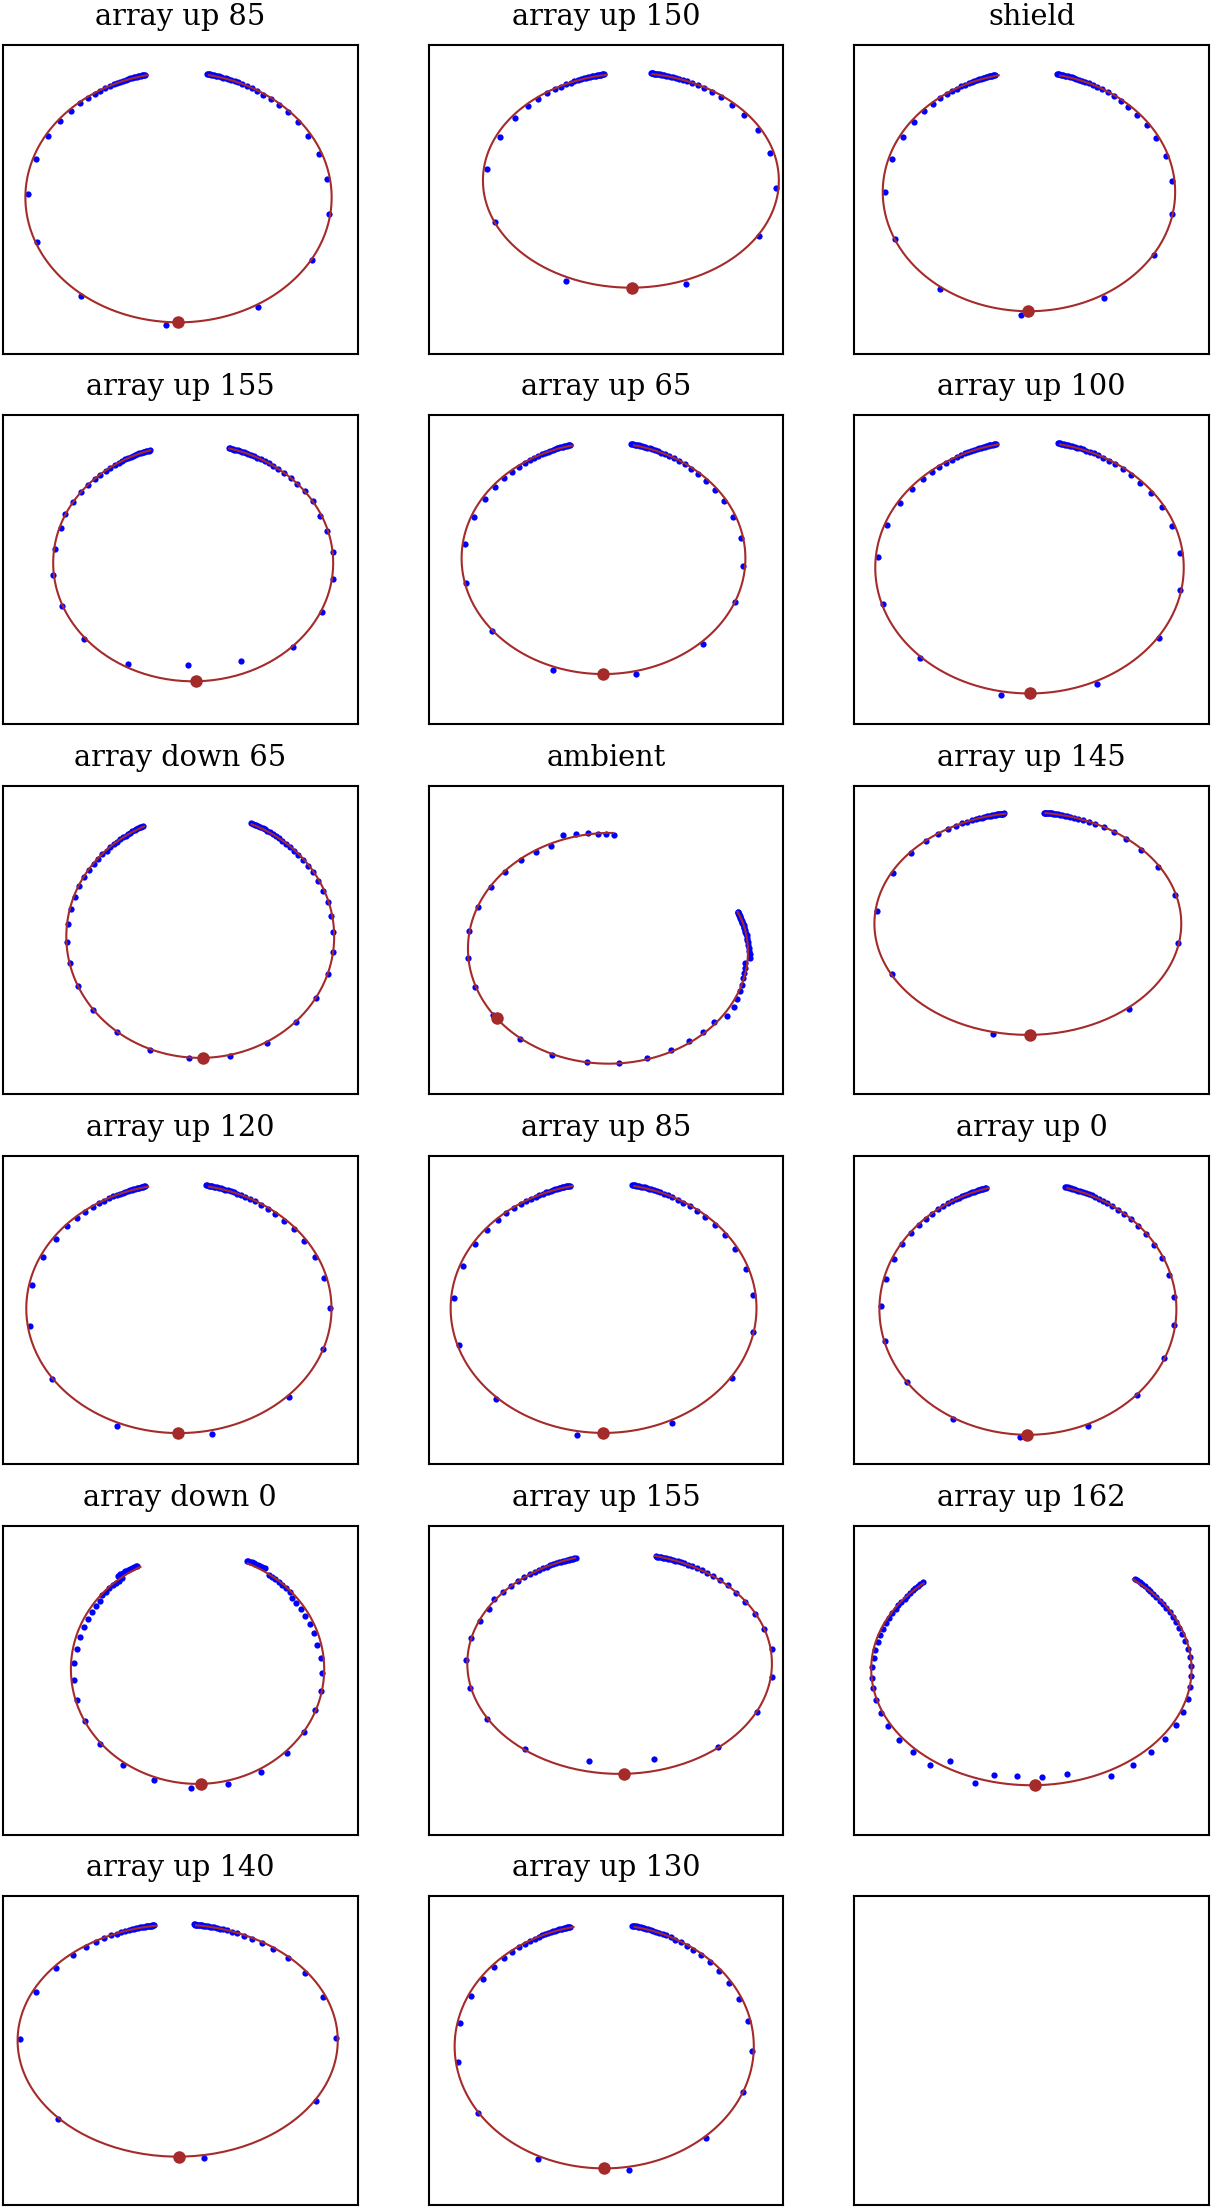

In [6]:
number = 0
dfn = df[df.number==number]
fig, axes = plt.subplots(6, 3, figsize=(6, 12))

for (n, row), ax in zip(dfn.iterrows(), axes.flatten()):
    if row.shield:
        title = 'shield'
    elif row.ambient:
        title = 'ambient'
    else:
        title = 'array'
        if row.magnet_array_orientation == 1:
            title += ' up'
        else:
            title += ' down'
        title += ' {:.0f}'.format(row.magnet_array_height_mm)
    plot_s21(ax, row)
    ax.set_title(title, fontsize='xx-small')
    ax.set_xticks([])
    ax.set_yticks([])
    x_min, x_max = ax.get_xlim()
    x_expand = 0.0 * (x_max - x_min)
    ax.set_xlim(x_min - x_expand, x_max + x_expand)
    y_min, y_max = ax.get_ylim()
    y_expand = 0.1 * (y_max - y_min)
    ax.set_ylim(y_min - y_expand, y_max + y_expand)

for ax in axes.flatten()[dfn.shape[0]:]:
    ax.set_xticks([])
    ax.set_yticks([]) 

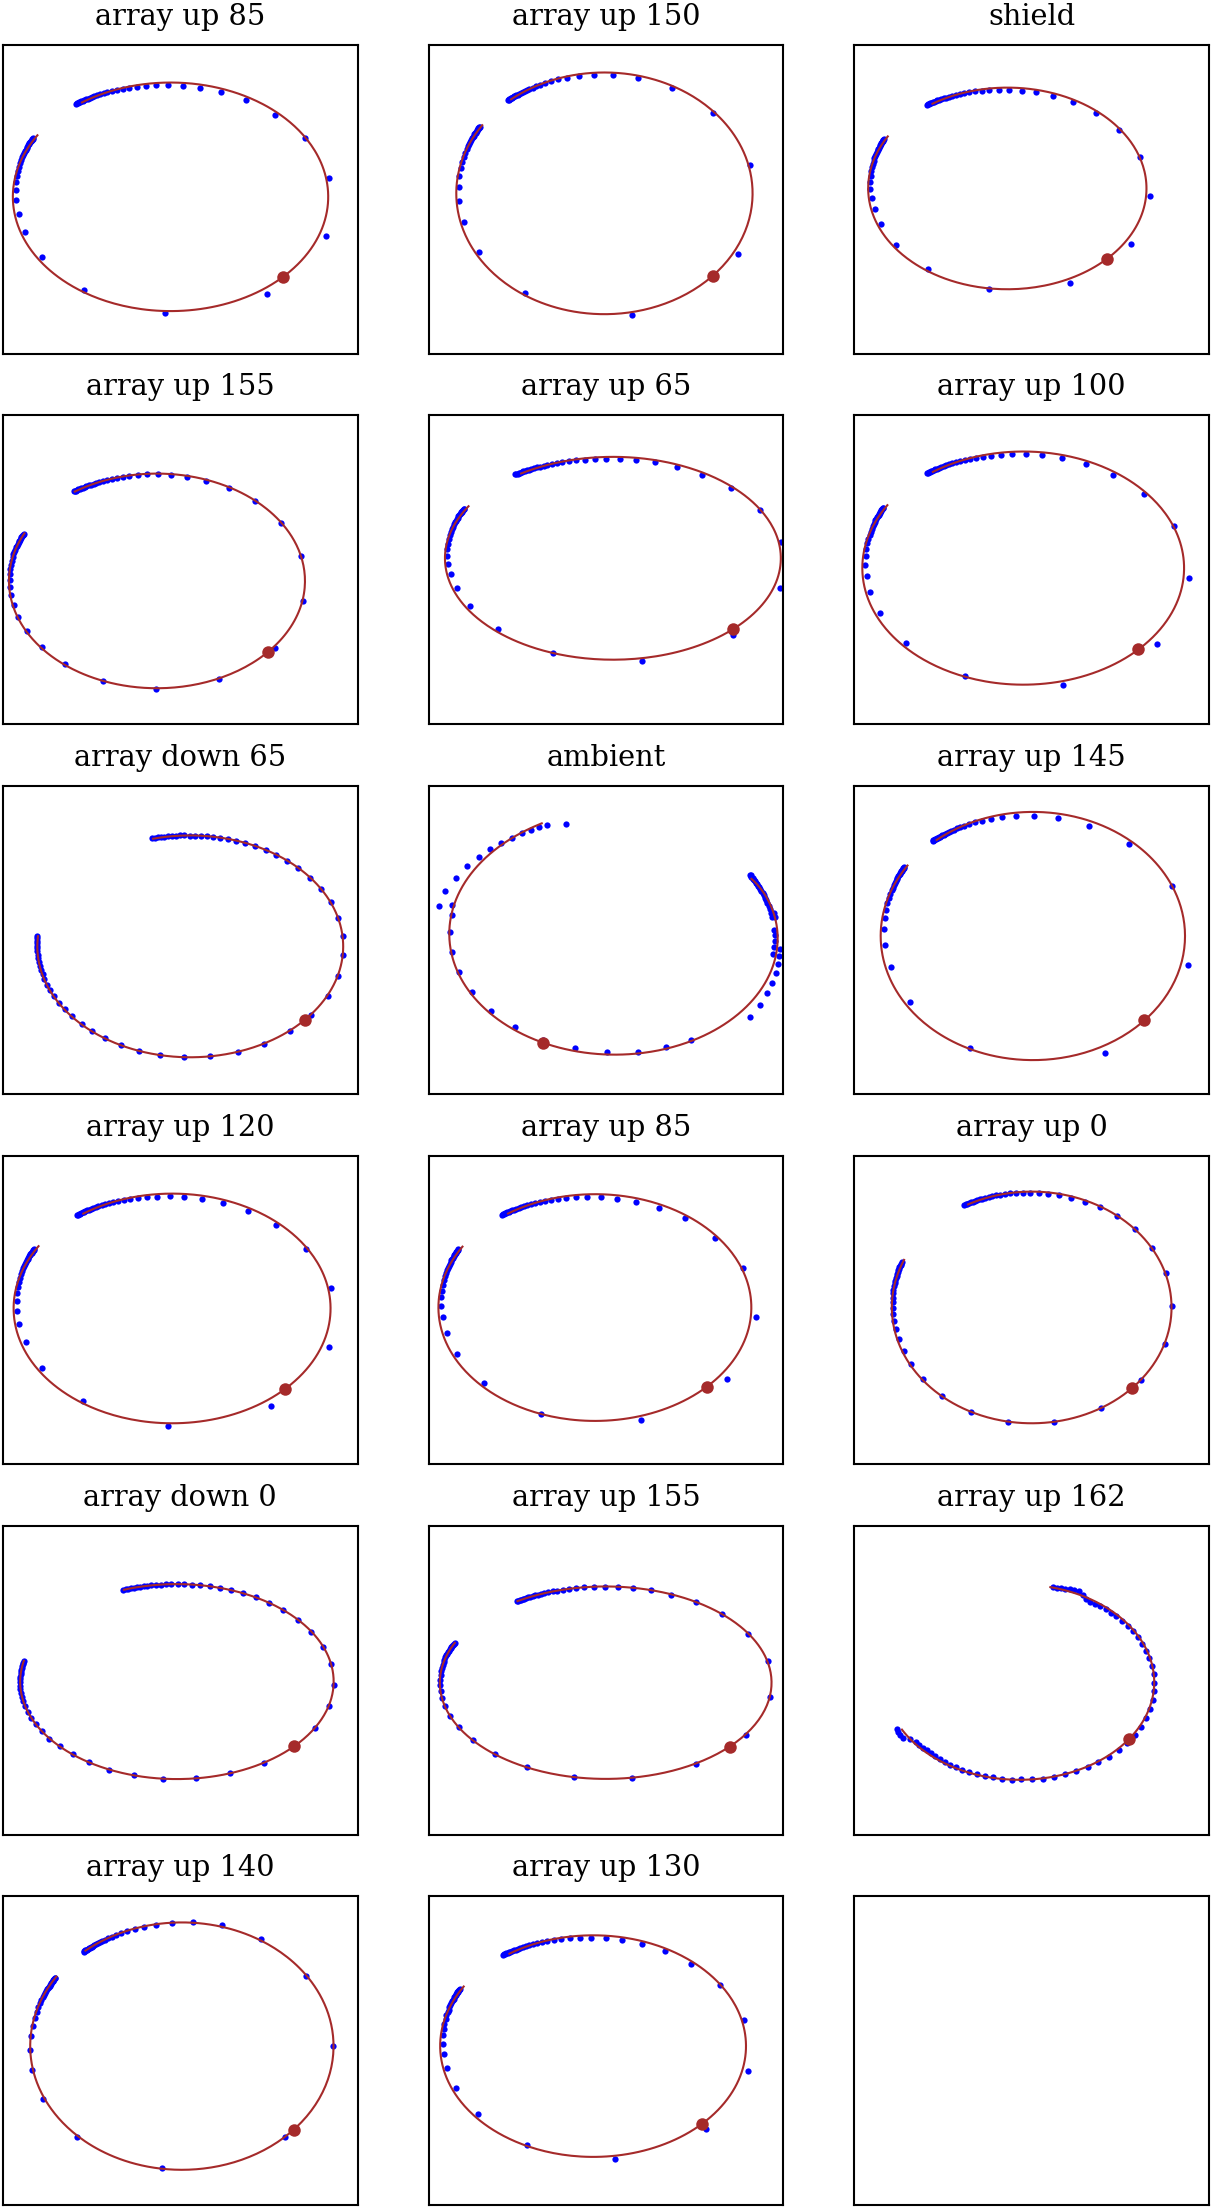

In [7]:
number = 1
dfn = df[df.number==number]
fig, axes = plt.subplots(6, 3, figsize=(6, 12))

for (n, row), ax in zip(dfn.iterrows(), axes.flatten()):
    if row.shield:
        title = 'shield'
    elif row.ambient:
        title = 'ambient'
    else:
        title = 'array'
        if row.magnet_array_orientation == 1:
            title += ' up'
        else:
            title += ' down'
        title += ' {:.0f}'.format(row.magnet_array_height_mm)
    plot_s21(ax, row)
    ax.set_title(title, fontsize='xx-small')
    ax.set_xticks([])
    ax.set_yticks([])
    x_min, x_max = ax.get_xlim()
    x_expand = 0.0 * (x_max - x_min)
    ax.set_xlim(x_min - x_expand, x_max + x_expand)
    y_min, y_max = ax.get_ylim()
    y_expand = 0.1 * (y_max - y_min)
    ax.set_ylim(y_min - y_expand, y_max + y_expand)

for ax in axes.flatten()[dfn.shape[0]:]:
    ax.set_xticks([])
    ax.set_yticks([]) 

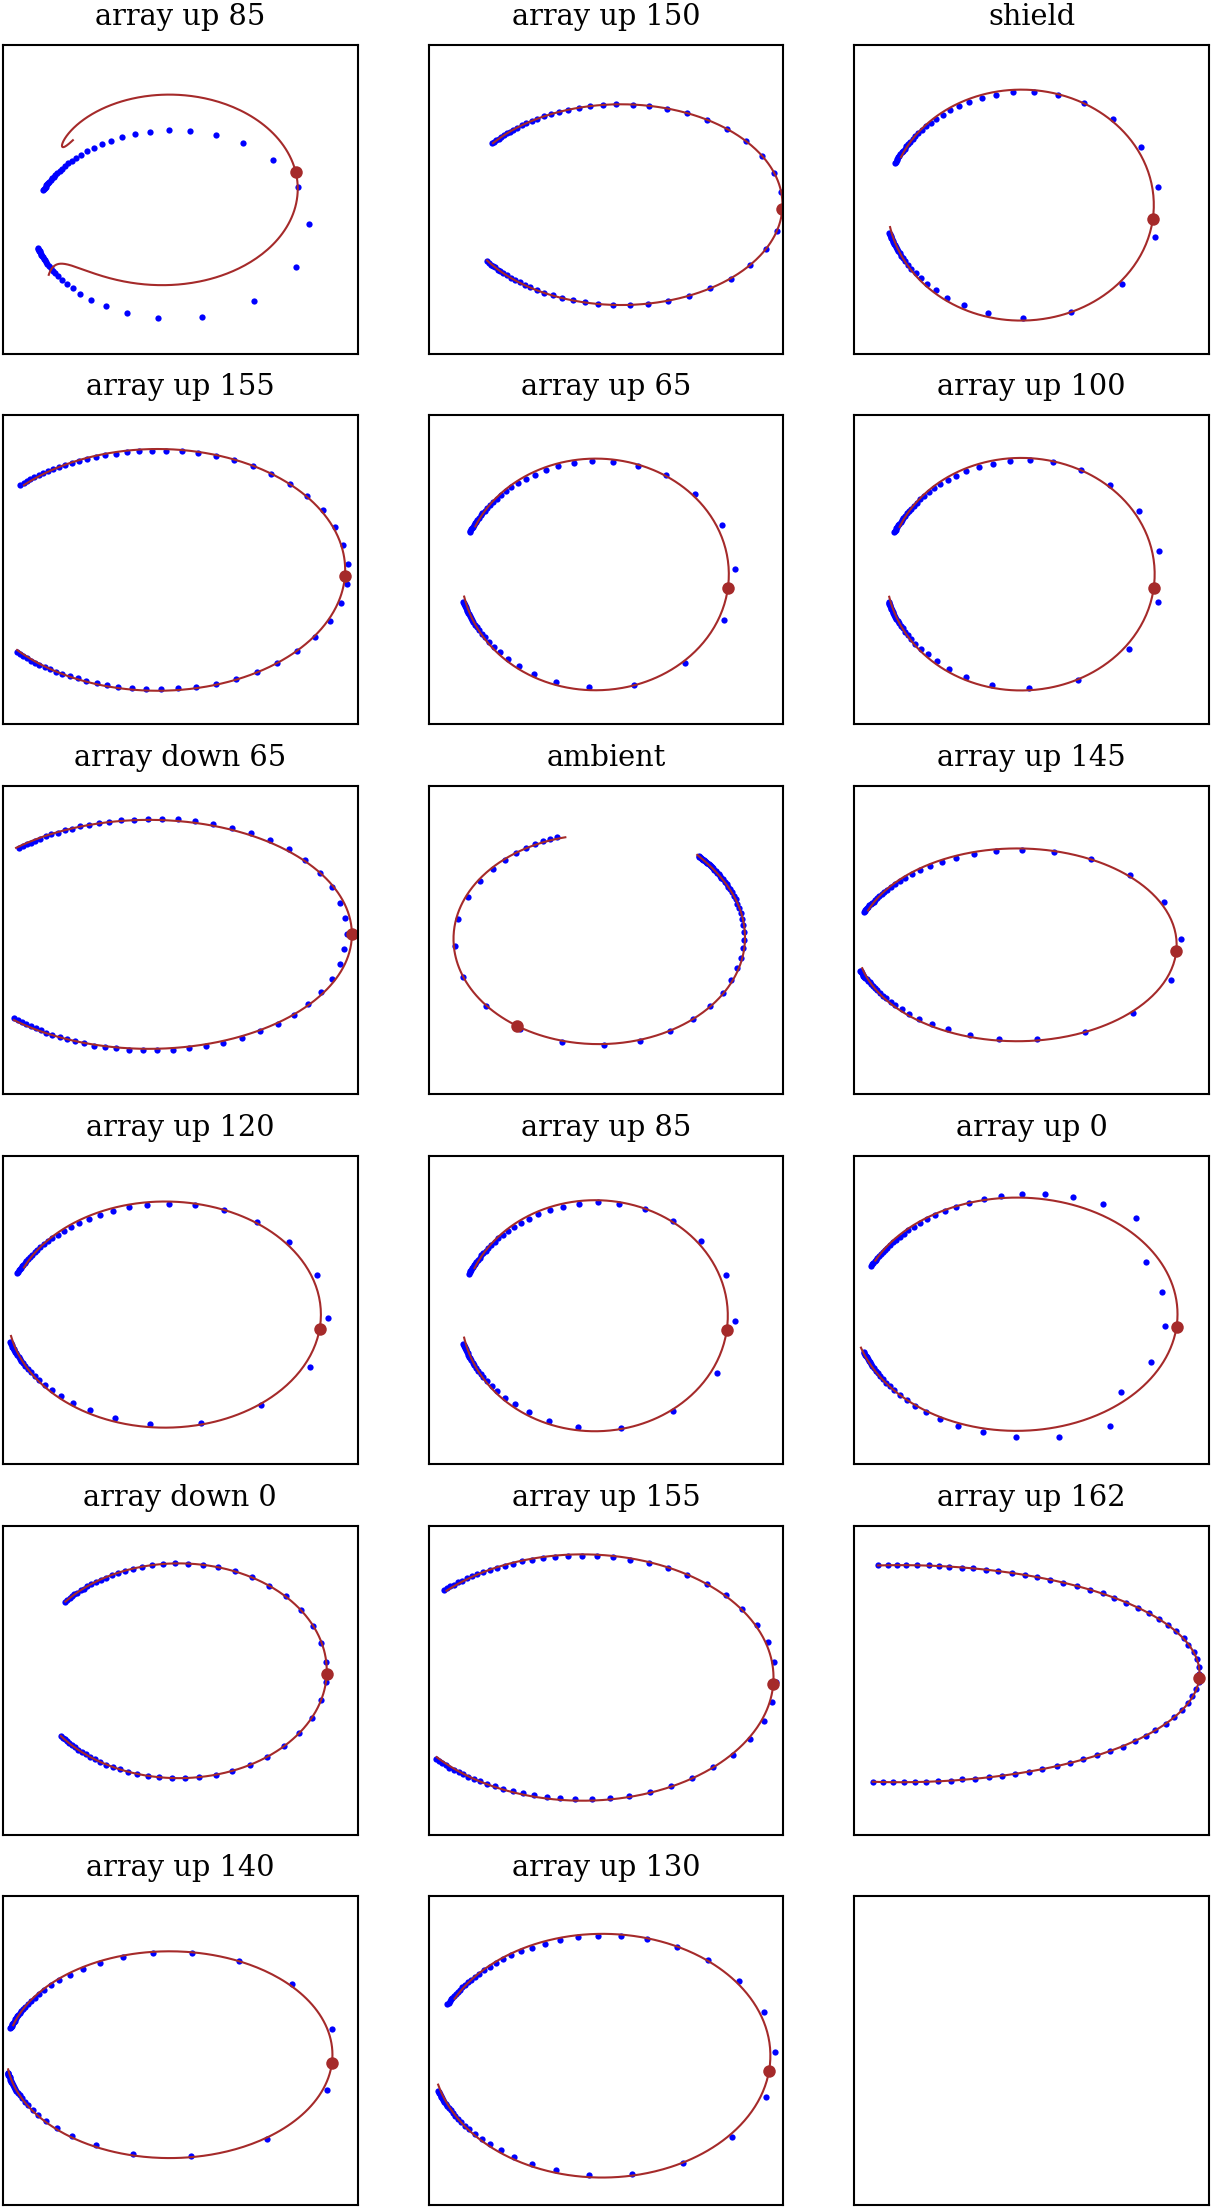

In [8]:
number = 2
fig, axes = plt.subplots(6, 3, figsize=(6, 12))
for (_, row), ax in zip(df[df.number==number].iterrows(), axes.flatten()):
    if row.shield:
        title = 'shield'
    elif row.ambient:
        title = 'ambient'
    else:
        title = 'array'
        if row.magnet_array_orientation == 1:
            title += ' up'
        else:
            title += ' down'
        title += ' {:.0f}'.format(row.magnet_array_height_mm)
    plot_s21(ax, row)
    ax.set_title(title, fontsize='xx-small')
    ax.set_xticks([])
    ax.set_yticks([])
    x_min, x_max = ax.get_xlim()
    x_expand = 0.0 * (x_max - x_min)
    ax.set_xlim(x_min - x_expand, x_max + x_expand)
    y_min, y_max = ax.get_ylim()
    y_expand = 0.1 * (y_max - y_min)
    ax.set_ylim(y_min - y_expand, y_max + y_expand)

for ax in axes.flatten()[dfn.shape[0]:]:
    ax.set_xticks([])
    ax.set_yticks([]) 

In [9]:
series = df[(df.magnet_array_height_mm == 162) & (df.number == 0)].iloc[0]

<Container object of 3 artists>

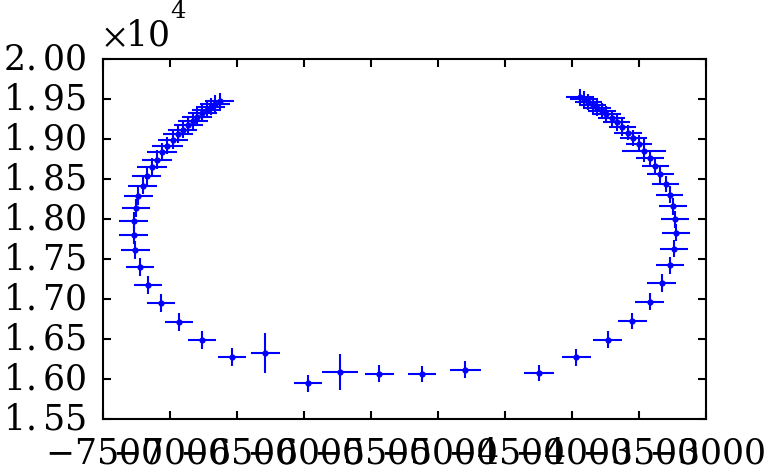

In [10]:
fig, ax = plt.subplots()
ax.errorbar(series.res_s21_data.real,
            series.res_s21_data.imag,
            xerr=1e2 * series.res_s21_errors.real,
            yerr=1e2 * series.res_s21_errors.imag,
            marker='.', linestyle='none')

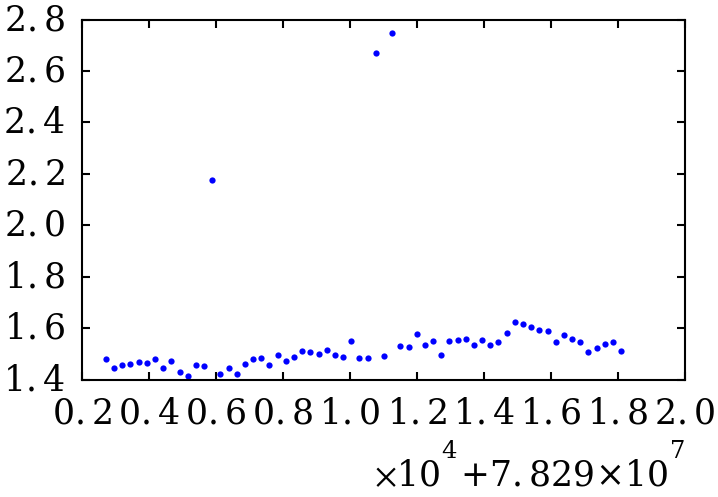

In [11]:
fig, ax = plt.subplots()
ax.plot(series.res_frequency_data, np.abs(series.res_s21_errors), '.')

(0.8, 2.7)

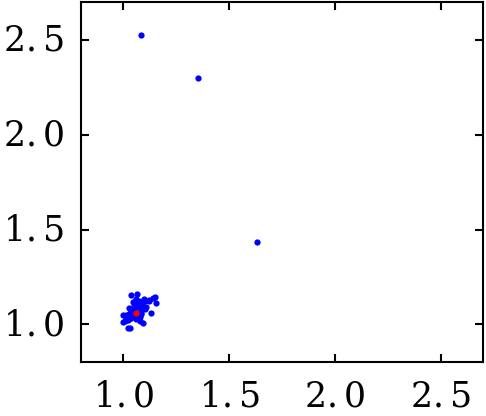

In [12]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(series.res_s21_errors.real, series.res_s21_errors.imag, '.')
ax.plot(np.median(series.res_s21_errors.real), np.median(series.res_s21_errors.imag), '.r')
ax.set_xlim(0.8, 2.7)
ax.set_ylim(0.8, 2.7)

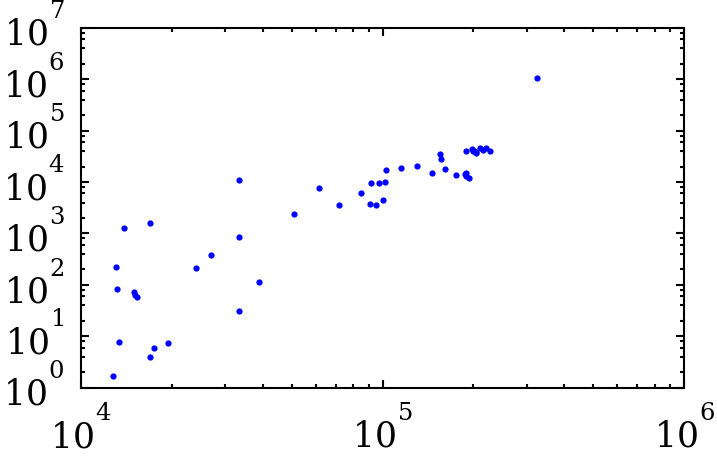

In [13]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(df.res_Q_i, df.res_redchi, '.')

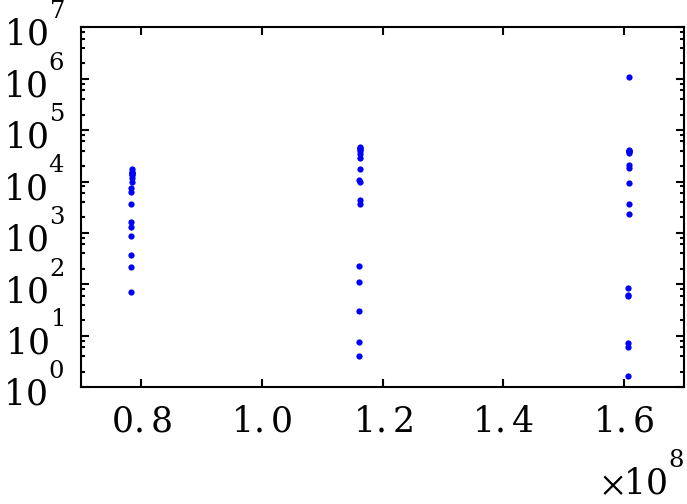

In [14]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(df.res_f_0, df.res_redchi, '.')